In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math
import random
sns.set()
np.random.seed(42)
import hvplot
import hvplot.pandas
import panel as pn
import pingouin

In [153]:
df = pd.read_csv("final_data_cleaned_for_analysis.csv")
df

,Timestamp,age,gender,level,income level,income level (num),ID,Current career /future career,Data scientist?,devices count,...,Self study hours,Entertainment (general) hours,sum of the time spent,processor.,is it intel,processor generation,how powerful from 1_to_5,graphics card model,how powerful from 1_to_5.1,point of view
0,2023/04/27 11:05:28 PM GMT+3,19,Female,First,Medium,2,NaN,Data scientist,1,4,...,1,1,4,Core i7,1,8,4.0,NaN,NaN,Laptop
1,2023/04/27 11:07:17 PM GMT+3,21 or more,Male,Third,Low,1,2.020145e+10,Data scientist,1,2,...,3,5,10,Ryzen 5,0,4,4.0,Integrated AMD Graphics,2.0,"PC, more flexible in terms of future upgrades ..."
2,2023/04/27 11:15:08 PM GMT+3,20,Female,Second,Medium,2,2.022146e+10,mobile developer,0,4,...,1,8,12,Ryzen 5,0,10,4.0,NaN,NaN,Laptop :Portability
3,2023/04/27 11:47:44 PM GMT+3,19,Female,Second,Medium,2,NaN,Data scientist,1,3,...,3,1,6,Intel Xeon,1,8,2.0,INTEL HD Graphics,2.0,Laptop
4,2023/04/27 7:04:17 PM GMT+3,21 or more,Female,Third,Medium,2,2.024865e+08,web developer,0,3,...,1,3,4,Core i7,1,7,3.0,NaN,NaN,"Laptop, I can move with it everywere"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023/05/05 11:55:34 PM GMT+3,19,Male,Second,Low,1,2.022169e+10,Data scientist,1,3,...,1,1,4,Ryzen 5,0,12,4.0,rtx 3060,5.0,i think that pc is better if you are thinking ...
102,2023/05/05 4:20:42 AM GMT+3,20,Female,Second,Lower medium,3,NaN,Electrical engineer,0,3,...,1,3,8,Core i7,1,11,5.0,NaN,NaN,Laptop because of mobility
103,2023/05/05 4:36:22 PM GMT+3,21 or more,Female,Fourth,Medium,2,2.019482e+09,Data scientist,1,3,...,5,3,16,Core i7,1,11,5.0,NaN,NaN,Pc for portability
104,2023/05/05 6:34:01 AM GMT+3,21 or more,Female,Fourth,Medium,2,NaN,Data scientist,1,4,...,3,5,18,Core i5,1,8,4.0,Intel Iris 5100,4.0,"PC, easily upgradable, costs less for same per..."


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Timestamp                          106 non-null    object 
 1   age                                106 non-null    object 
 2   gender                             106 non-null    object 
 3   level                              106 non-null    object 
 4   income level                       106 non-null    object 
 5   income level (num)                 106 non-null    int64  
 6   ID                                 76 non-null     float64
 7   Current career /future career      104 non-null    object 
 8   Data scientist?                    106 non-null    int64  
 9   devices count                      106 non-null    object 
 10  own Laptop                         106 non-null    object 
 11  own DeskTop                        106 non-null    object 

In [155]:
df_test_alpha = df.iloc[:,13:26]

In [156]:
# pingouin.cronbach_alpha(data = df_test_alpha)

In [157]:
df.columns

Index(['Timestamp', 'age', 'gender', 'level', 'income level',
       'income level (num)', 'ID', 'Current career /future career',
       'Data scientist?', 'devices count', 'own Laptop', 'own DeskTop',
       'own Tablet', 'device use ratio ', 'main device', 'MAIN usage device',
       'Surfing the internet', 'device price', 'what would you rebuy',
       'would he chage his device', 'operating system',
       'device's performance.', 'Screen size importance',
       'Portability importance', 'Upgradability importance',
       ' working without cable importance', 'Performance importance',
       'Affordability importance', 'CD existence importance',
       'Integrated camera importance', 'Multiple monitors importance',
       'hours Gaming', 'hours Work', 'hours Academic study',
       'Self study hours ', 'Entertainment (general) hours ',
       'sum of the time spent', 'processor.', 'is it intel ',
       'processor generation', 'how powerful from 1_to_5',
       'graphics card model

## Data Cleaning

In [158]:
df.drop(axis = 0, index = 65,inplace = True)

In [159]:
df.drop(columns=["Timestamp", 'ID', 'point of view','graphics card model','how powerful from 1_to_5.1', 'main device', 
                            'is it intel ', 'sum of the time spent', 'own DeskTop', 'own Laptop', 'Data scientist?',  
                            'would he chage his device'], inplace=True)

# don't use ['main_usage_device','income_level', 'gender'] 

In [160]:
df.rename(columns= {'Current career /future career':'career_path','is it intel ':'intel'},inplace=True)
df.rename(columns = lambda x: x.replace("'s",""),inplace=True)
df.rename(columns = lambda x: x.replace('.',''),inplace=True)
df.rename(columns = lambda x: x.replace('?',''),inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace(' ','_'),inplace=True)

In [161]:
df['device_use_ratio'].value_counts()

device_use_ratio
I only use laptop                              33
I don�t have both                              23
80% using laptop 20% using desktop computer    19
20% using laptop 80% using desktop computer    10
60% using laptop 40% using desktop computer     7
I only use PC                                   6
40% using laptop 60% using desktop computer     4
I don’t have both                               2
50% using laptop 50% using desktop computer     1
Name: count, dtype: int64

In [162]:
df.device_use_ratio = df.device_use_ratio.replace(["I don�t have both", "I don’t have both"], 'I have neither')

In [163]:
df['desktop_perc'] = df.device_use_ratio.replace(['I have neither', 'I only use laptop', '80% using laptop 20% using desktop computer',
                                               '60% using laptop 40% using desktop computer', '50% using laptop 50% using desktop computer',
                                               '40% using laptop 60% using desktop computer', '20% using laptop 80% using desktop computer', 
                                               'I only use PC'], [0, 0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
df['laptop_perc'] = df.device_use_ratio.replace(['I have neither', 'I only use laptop', '80% using laptop 20% using desktop computer',
                                               '60% using laptop 40% using desktop computer', '50% using laptop 50% using desktop computer',
                                               '40% using laptop 60% using desktop computer', '20% using laptop 80% using desktop computer', 
                                               'I only use PC'], [0, 1, 0.8, 0.6, 0.5, 0.4, 0.2, 0])

df.drop(columns=['device_use_ratio'], inplace=True)

In [164]:
df['desktop_perc'].unique()

array([0. , 0.2, 0.8, 0.4, 1. , 0.6, 0.5])

In [165]:
df.device_price.replace('          ', None, inplace = True)
df.device_price.replace('           ', None, inplace = True)
df.device_price.unique()

array(['15000', '13000', '8000', '18000', '26000', '10000', '30000',
       '28000', '35000', '13800', '3500', '21000', '20000', '16000',
       '19000', '17000', '5000', None, '12000', '25000', '14000', '23000',
       '4000', '18500', '4500', '11000', '3000', '18950', '24000',
       '40000', '32000', '2400', '14800', '22000', '50000', '4600',
       '7000', '3900', '27000', '38000', '15500', '7500'], dtype=object)

In [166]:
df.device_price = df.device_price.replace(' ', None, regex=True).astype(float)
df.device_price.fillna(df.device_price.mean(), inplace=True)

In [167]:
df.how_powerful_from_1_to_5.fillna(round(df.how_powerful_from_1_to_5.mean()), inplace=True)

In [168]:
df.how_powerful_from_1_to_5.unique()

array([4., 2., 3., 5., 1.])

In [169]:
df['device_price'].unique()

array([15000.        , 13000.        ,  8000.        , 18000.        ,
       26000.        , 10000.        , 30000.        , 28000.        ,
       35000.        , 13800.        ,  3500.        , 21000.        ,
       20000.        , 16000.        , 19000.        , 17000.        ,
        5000.        , 18114.64646465, 12000.        , 25000.        ,
       14000.        , 23000.        ,  4000.        , 18500.        ,
        4500.        , 11000.        ,  3000.        , 18950.        ,
       24000.        , 40000.        , 32000.        ,  2400.        ,
       14800.        , 22000.        , 50000.        ,  4600.        ,
        7000.        ,  3900.        , 27000.        , 38000.        ,
       15500.        ,  7500.        ])

In [170]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [171]:
df.age = df.age.replace('21 or more', 21)
df.age = df.age.astype(int)

In [172]:
df.level.value_counts()

level
Second    42
First     34
Third     15
Fourth    14
Name: count, dtype: int64

In [173]:
df.level.unique()
df.level = df.level.replace(['First', 'Second', 'Third', 'Fourth'], [1, 2, 3, 4])

In [174]:
df.devices_count.value_counts()

devices_count
3            48
4            27
2            24
5 or more     4
1             2
Name: count, dtype: int64

In [175]:
df.devices_count = df.devices_count.replace('5 or more', 5).astype(int)

In [176]:
df['what_would_you_rebuy_for_laptop_imp'] = df.what_would_you_rebuy.replace(['Laptop', 'Desktop computer'], [1, 0])
df['what_would_you_rebuy_for_desktop_imp'] = df.what_would_you_rebuy.replace(['Desktop computer', 'Laptop'], [1, 0])
df.drop(columns=['what_would_you_rebuy'], inplace=True)

In [177]:
df.how_powerful_from_1_to_5.value_counts()

how_powerful_from_1_to_5
5.0    33
3.0    32
4.0    27
2.0     8
1.0     5
Name: count, dtype: int64

## Descriptive Statistics

In [178]:
dfplot=df.select_dtypes(exclude=['object'])
dfplot

,age,level,income_level_(num),devices_count,surfing_the_internet,device_price,screen_size_importance,portability_importance,upgradability_importance,working_without_cable_importance,...,hours_work,hours_academic_study,self_study_hours,entertainment_(general)_hours,processor_generation,how_powerful_from_1_to_5,desktop_perc,laptop_perc,what_would_you_rebuy_for_laptop_imp,what_would_you_rebuy_for_desktop_imp
0,19,1,2,4,0,15000.0,4,4,4,4,...,1,5,1,1,8,4.0,0.0,1.0,1,0
1,21,3,1,2,0,13000.0,3,1,5,1,...,3,1,3,5,4,4.0,0.0,0.0,0,1
2,20,2,2,4,0,8000.0,3,4,3,5,...,1,5,1,8,10,4.0,0.0,1.0,1,0
3,19,2,2,3,0,18000.0,4,4,3,5,...,1,5,3,1,8,2.0,0.2,0.8,1,0
4,21,3,2,3,0,15000.0,2,2,1,1,...,1,3,1,3,7,3.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,2,1,3,0,30000.0,5,1,4,1,...,1,1,1,1,12,4.0,0.8,0.2,0,1
102,20,2,3,3,1,30000.0,4,5,2,3,...,1,7,1,3,11,5.0,0.2,0.8,1,0
103,21,4,2,3,0,38000.0,4,4,3,3,...,7,5,5,3,11,5.0,0.2,0.8,1,0
104,21,4,2,4,0,15500.0,3,4,4,4,...,7,3,3,5,8,4.0,0.6,0.4,0,1


age
level
income_level_(num)
devices_count
surfing_the_internet
device_price
screen_size_importance
portability_importance
upgradability_importance
working_without_cable_importance
performance_importance


C:\Users\Blu-ray\AppData\Local\Temp\ipykernel_22964\340710176.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


affordability_importance
cd_existence_importance
integrated_camera_importance
multiple_monitors_importance
hours_gaming
hours_work
hours_academic_study
self_study_hours
entertainment_(general)_hours
processor_generation
how_powerful_from_1_to_5
desktop_perc
laptop_perc
what_would_you_rebuy_for_laptop_imp
what_would_you_rebuy_for_desktop_imp


<Figure size 640x480 with 0 Axes>

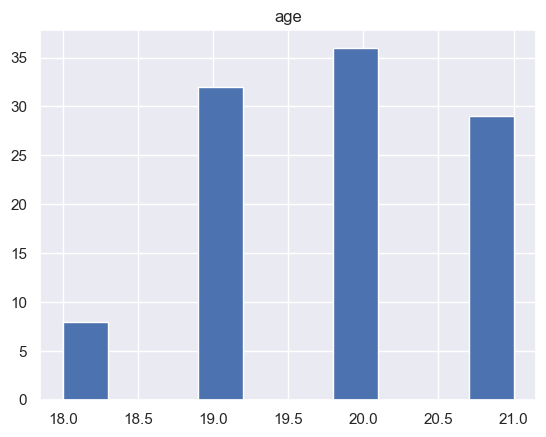

<Figure size 640x480 with 0 Axes>

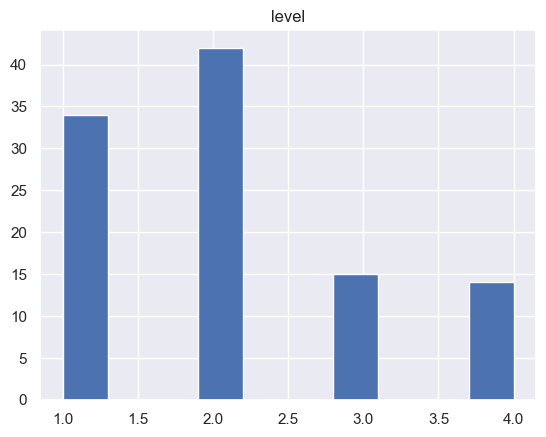

<Figure size 640x480 with 0 Axes>

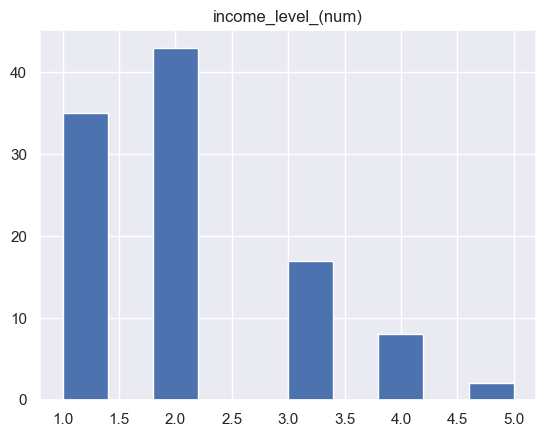

<Figure size 640x480 with 0 Axes>

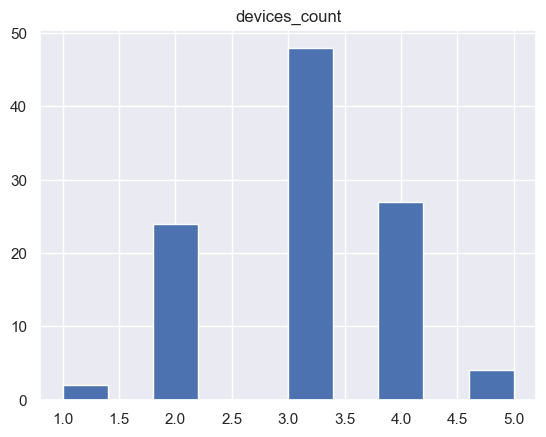

<Figure size 640x480 with 0 Axes>

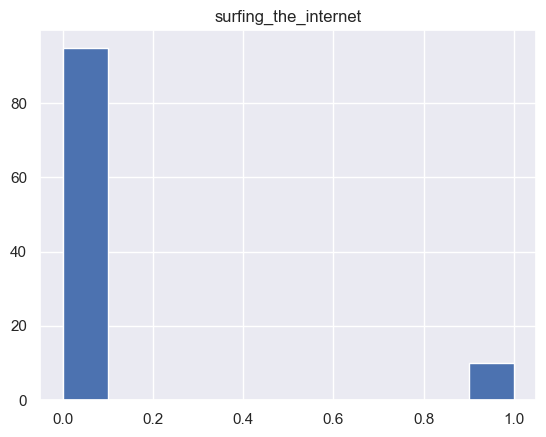

<Figure size 640x480 with 0 Axes>

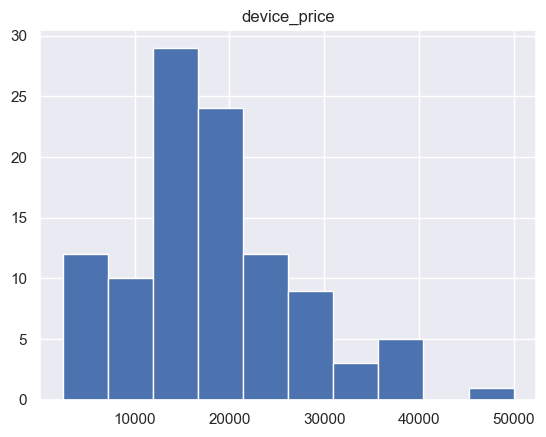

<Figure size 640x480 with 0 Axes>

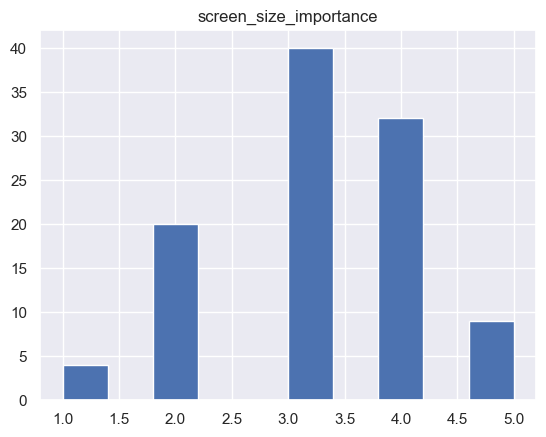

<Figure size 640x480 with 0 Axes>

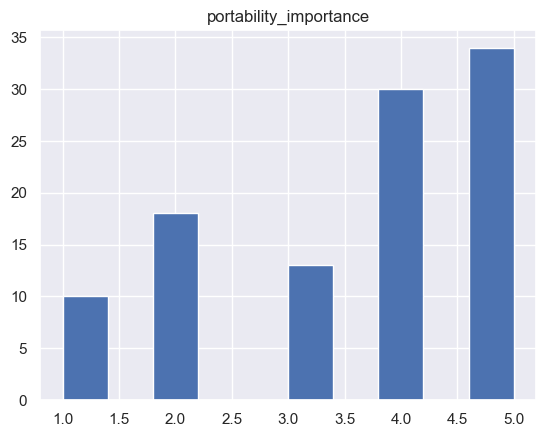

<Figure size 640x480 with 0 Axes>

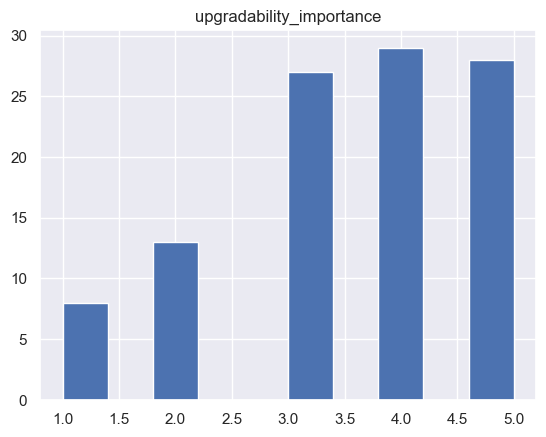

<Figure size 640x480 with 0 Axes>

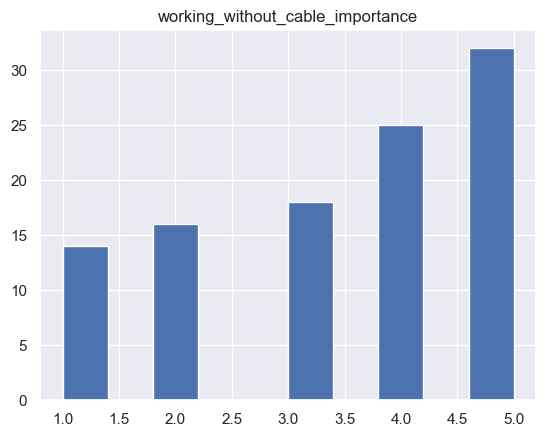

<Figure size 640x480 with 0 Axes>

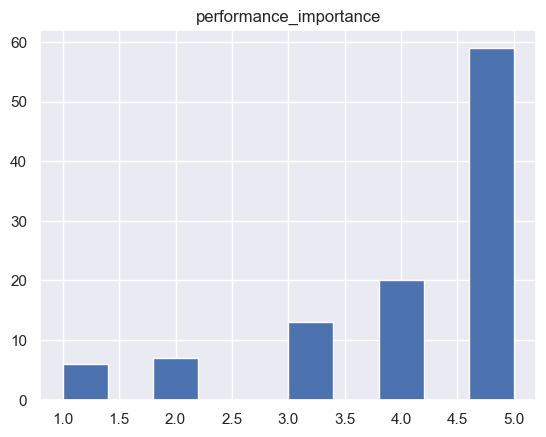

<Figure size 640x480 with 0 Axes>

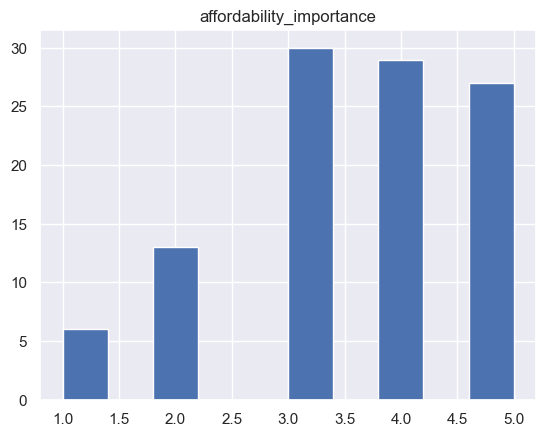

<Figure size 640x480 with 0 Axes>

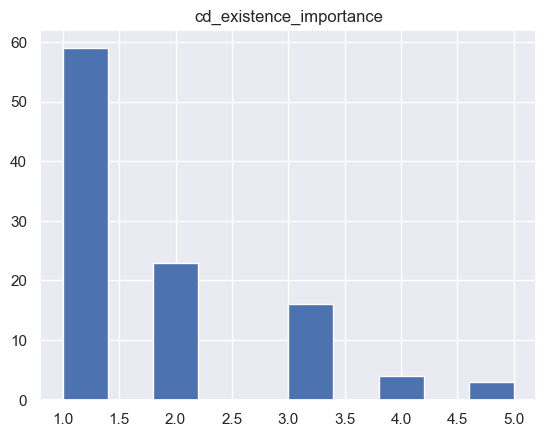

<Figure size 640x480 with 0 Axes>

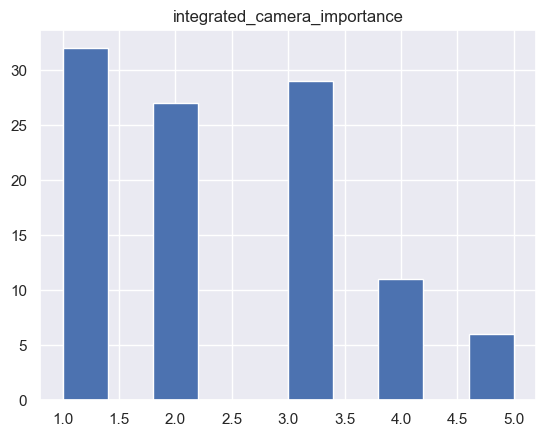

<Figure size 640x480 with 0 Axes>

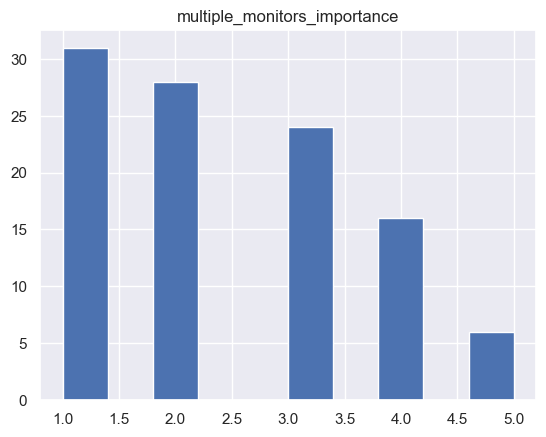

<Figure size 640x480 with 0 Axes>

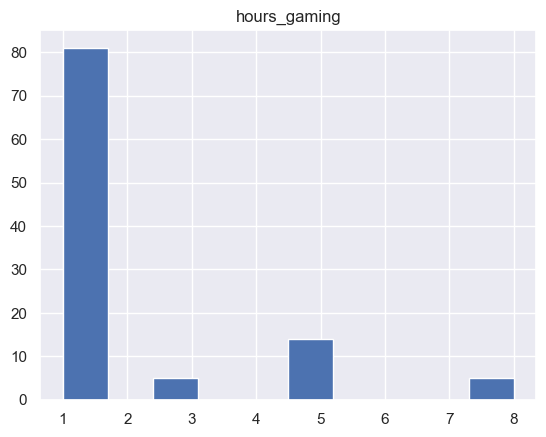

<Figure size 640x480 with 0 Axes>

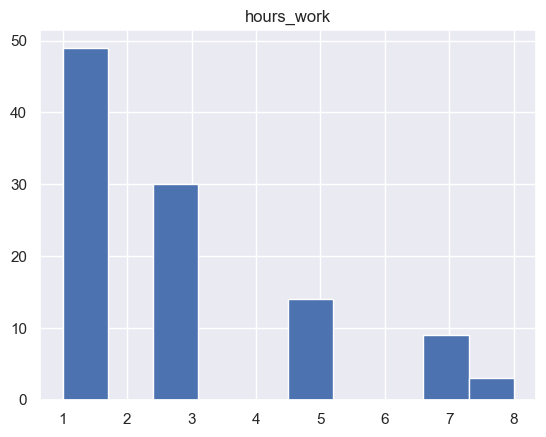

<Figure size 640x480 with 0 Axes>

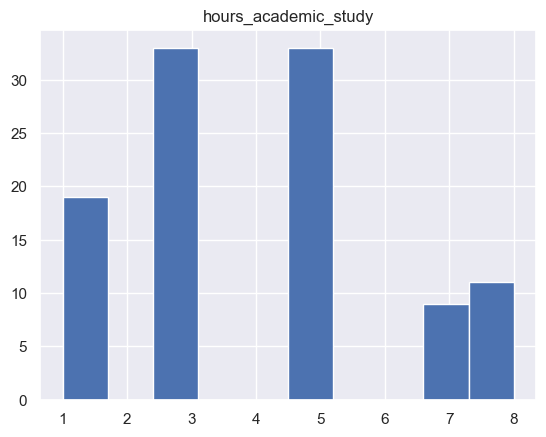

<Figure size 640x480 with 0 Axes>

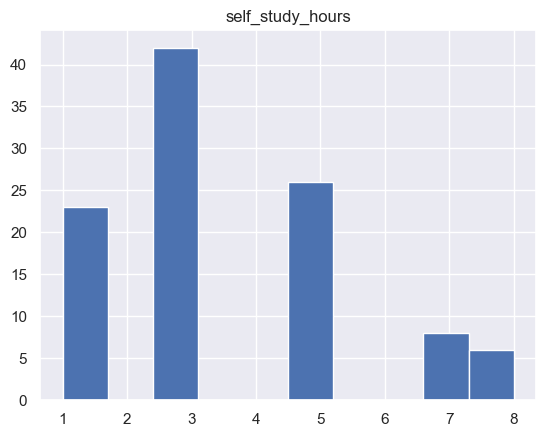

<Figure size 640x480 with 0 Axes>

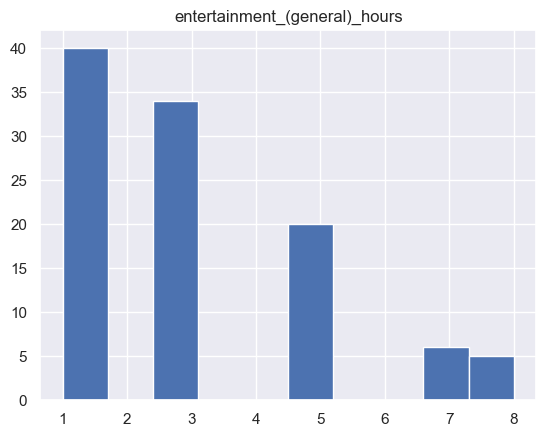

<Figure size 640x480 with 0 Axes>

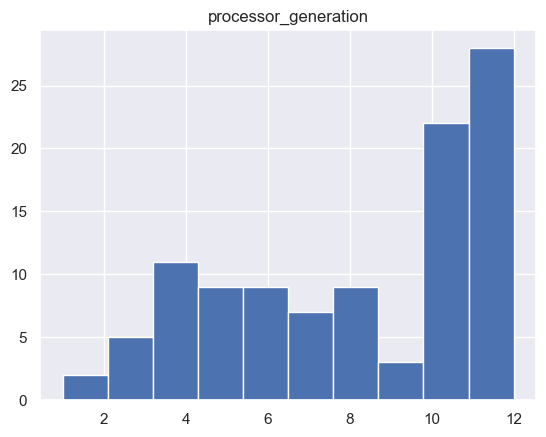

<Figure size 640x480 with 0 Axes>

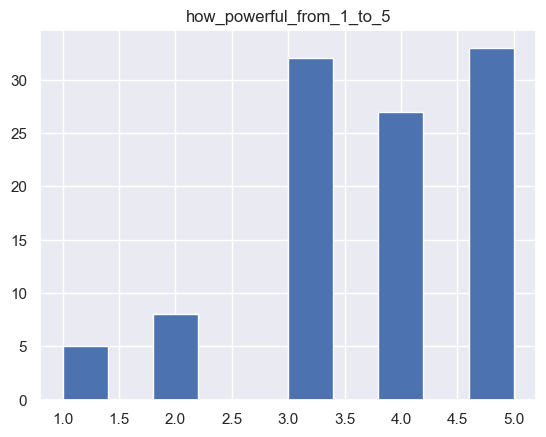

<Figure size 640x480 with 0 Axes>

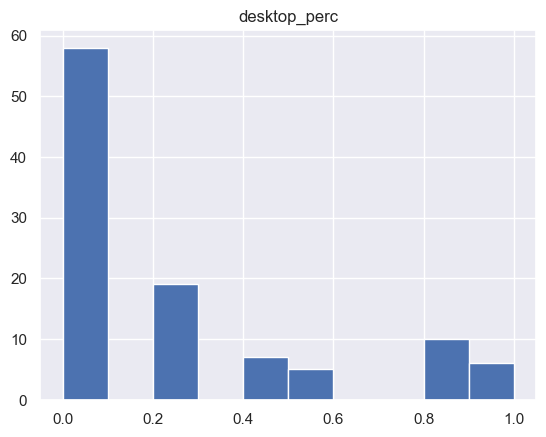

<Figure size 640x480 with 0 Axes>

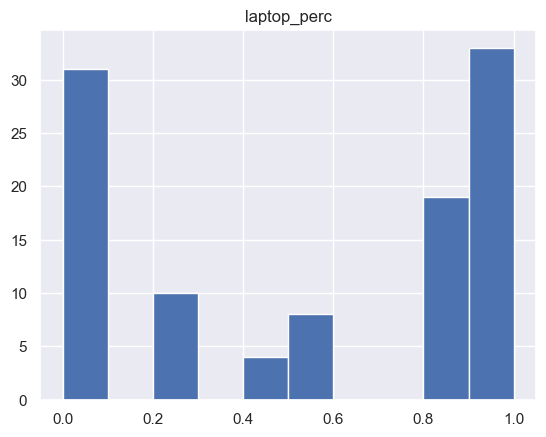

<Figure size 640x480 with 0 Axes>

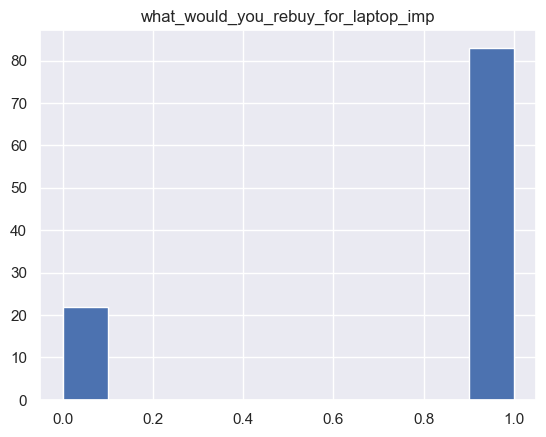

<Figure size 640x480 with 0 Axes>

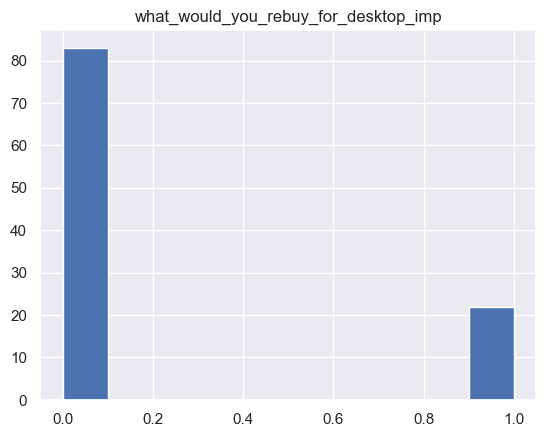

In [179]:
for column in dfplot:
    print(column)
    plt.figure()
    dfplot.hist([column])


In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,105.0,19.819048,0.927994,18.0,19.0,20.0,21.0,21.0
level,105.0,2.085714,1.001098,1.0,1.0,2.0,3.0,4.0
income_level_(num),105.0,2.038095,0.989598,1.0,1.0,2.0,3.0,5.0
devices_count,105.0,3.066667,0.846562,1.0,3.0,3.0,4.0,5.0
surfing_the_internet,105.0,0.095238,0.294951,0.0,0.0,0.0,0.0,1.0
device_price,105.0,18114.646465,9502.439597,2400.0,13000.0,17000.0,23000.0,50000.0
screen_size_importance,105.0,3.209524,0.977588,1.0,3.0,3.0,4.0,5.0
portability_importance,105.0,3.571429,1.350621,1.0,2.0,4.0,5.0,5.0
upgradability_importance,105.0,3.533333,1.225268,1.0,3.0,4.0,5.0,5.0
working_without_cable_importance,105.0,3.428571,1.406422,1.0,2.0,4.0,5.0,5.0


In [181]:
df.columns

Index(['age', 'gender', 'level', 'income_level', 'income_level_(num)',
       'career_path', 'devices_count', 'own_tablet', 'main_usage_device',
       'surfing_the_internet', 'device_price', 'operating_system',
       'device_performance', 'screen_size_importance',
       'portability_importance', 'upgradability_importance',
       'working_without_cable_importance', 'performance_importance',
       'affordability_importance', 'cd_existence_importance',
       'integrated_camera_importance', 'multiple_monitors_importance',
       'hours_gaming', 'hours_work', 'hours_academic_study',
       'self_study_hours', 'entertainment_(general)_hours', 'processor',
       'processor_generation', 'how_powerful_from_1_to_5', 'desktop_perc',
       'laptop_perc', 'what_would_you_rebuy_for_laptop_imp',
       'what_would_you_rebuy_for_desktop_imp'],
      dtype='object')

In [182]:
# df.corr().portability_importance['working_without_cable_importance']

In [183]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level                          105 non-null    object 
 4   income_level_(num)                    105 non-null    int64  
 5   career_path                           105 non-null    object 
 6   devices_count                         105 non-null    int32  
 7   own_tablet                            105 non-null    object 
 8   main_usage_device                     105 non-null    object 
 9   surfing_the_internet                  105 non-null    int64  
 10  device_price                          105 non-null    float64
 11  operating_system        

In [184]:
replace_map = {'Medium end device ' : 'Medium end device', 'high end specs ': 'high end specs'}
df["device_performance"] = df["device_performance"].replace(replace_map)
df["device_performance"].unique()

array(['Medium end device', 'medium high specs', 'high end specs',
       'Low end device'], dtype=object)

In [185]:
group = df.groupby(["device_performance"])
group.count()

,age,gender,level,income_level,income_level_(num),career_path,devices_count,own_tablet,main_usage_device,surfing_the_internet,...,hours_academic_study,self_study_hours,entertainment_(general)_hours,processor,processor_generation,how_powerful_from_1_to_5,desktop_perc,laptop_perc,what_would_you_rebuy_for_laptop_imp,what_would_you_rebuy_for_desktop_imp
device_performance,,,,,,,,,,,,,,,,,,,,,
Low end device,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Medium end device,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
high end specs,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
medium high specs,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


<Axes: ylabel='level'>

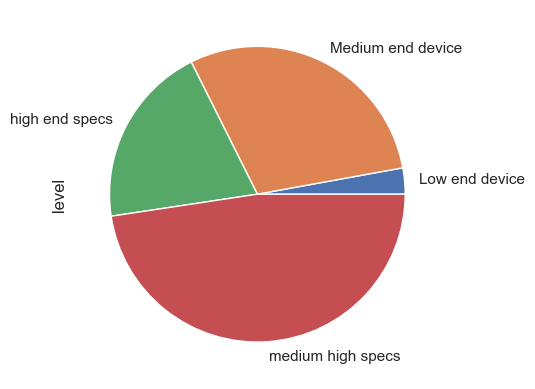

In [186]:
group.count()["level"].plot.pie()

We see that the sampling is not representative enough for low end devices, which is expected given that the sample is drawn from Computer science majors and professionals, we focus on analyzing the differences between the other 3 segments

In [187]:
df_by_performance = df[df["device_performance"] != "Low end device"]
group = df_by_performance.groupby("device_performance")

<Axes: ylabel='level'>

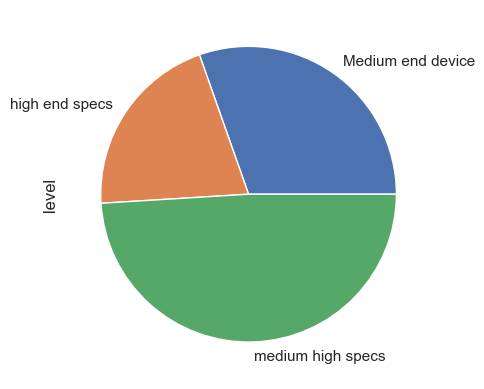

In [188]:
group.count()["level"].plot.pie()

In [189]:
# group.mean()["device_price"]

We see that device price is consistent with device performance

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level                          105 non-null    object 
 4   income_level_(num)                    105 non-null    int64  
 5   career_path                           105 non-null    object 
 6   devices_count                         105 non-null    int32  
 7   own_tablet                            105 non-null    object 
 8   main_usage_device                     105 non-null    object 
 9   surfing_the_internet                  105 non-null    int64  
 10  device_price                          105 non-null    float64
 11  operating_system        

<Axes: xlabel='what_would_you_rebuy_for_laptop_imp', ylabel='device_price'>

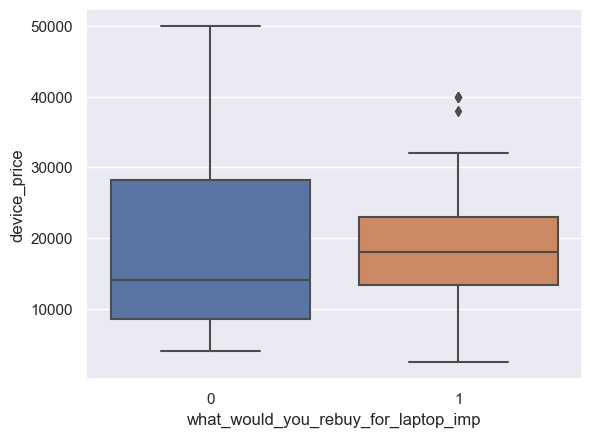

In [191]:
sns.boxplot(y = df["device_price"], x = df["what_would_you_rebuy_for_laptop_imp"], orient = "v")


## Inferential statistics

In [192]:
total_ratio = df["what_would_you_rebuy_for_laptop_imp"].sum() / df["what_would_you_rebuy_for_laptop_imp"].count()
total_ratio

0.7904761904761904

In [193]:
df['what_would_you_rebuy_for_laptop_imp'].std()

0.408920673500518

#### Do people spend more on PCs or laptops?

In [194]:
df_pc = df[df['what_would_you_rebuy_for_laptop_imp'] == 0]
df_lap = df[df['what_would_you_rebuy_for_laptop_imp'] == 1]

(array([12., 10., 29., 24., 12.,  9.,  3.,  5.,  0.,  1.]),
 array([ 2400.,  7160., 11920., 16680., 21440., 26200., 30960., 35720.,
        40480., 45240., 50000.]),
 <BarContainer object of 10 artists>)

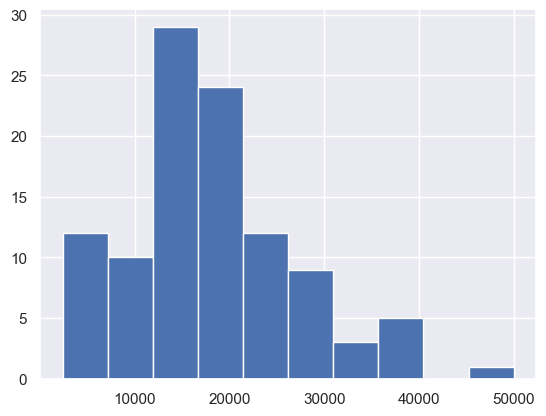

In [195]:
plt.hist(df["device_price"])

In [196]:
mean_income_lap = df_lap["device_price"].mean()
mean_income_pc = df_pc["device_price"].mean()
print(mean_income_lap)
print(mean_income_pc)

18070.159425581114
18282.4839302112


$H_0: \mu_1 \leq \mu_2$<br>
$H_1: \mu_1 > \mu_2$

Since the sample sizes are very small and the distributions are hard to identify, we use empirical statistical methods to perform hypothesis testing.
The most suitable to use here is bootstrap.

In [197]:
iterations = 1000
bootstrap_data = np.zeros(iterations)
for i in range(iterations):
    bootstrap_data[i] = np.random.choice(df_lap["device_price"], size = 23, replace = True).mean() - np.random.choice(df_pc["device_price"], size = 23, replace = True).mean()

In [198]:
bootstrap_data.sort()


In [199]:
bootstrap_data[1:20]

array([-9768.92841458, -9550.        , -8731.07158542, -7994.37856829,
       -7984.14580588, -7851.53711023, -7816.75450154, -7803.71102328,
       -7682.60869565, -7608.69565217, -7301.53711023, -7226.08695652,
       -7178.26086957, -6913.04347826, -6890.66754502, -6726.08695652,
       -6701.27360562, -6694.37856829, -6675.45015371])

(array([  3.,  11.,  70., 148., 295., 279., 142.,  48.,   3.,   1.]),
 array([-11847.18928415,  -9461.62714097,  -7076.0649978 ,  -4690.50285463,
         -2304.94071146,     80.62143171,   2466.18357488,   4851.74571805,
          7237.30786122,   9622.87000439,  12008.43214756]),
 <BarContainer object of 10 artists>)

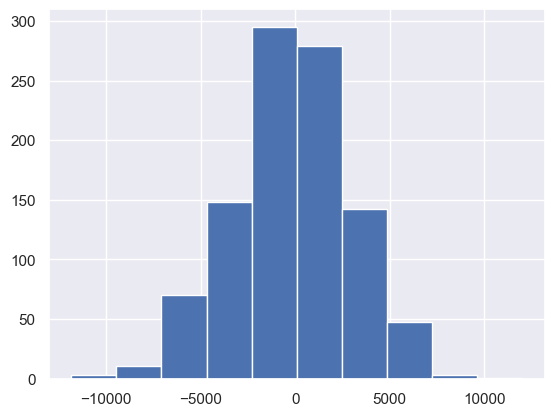

In [200]:
plt.hist(bootstrap_data)

In [201]:
bootstrap_point_mean = bootstrap_data.mean()
bootstrap_point_mean

-168.58392621870897

In [202]:
alpha = 0.05

The bootstrap confidence interval is constructed by taking the value at $(\alpha \times iterations )\space  and \space (iterations - \alpha \times iterations)$

In [203]:
left_bound =  bootstrap_data[math.ceil(alpha * iterations)]
right_bound = bootstrap_data[math.ceil(1 - alpha * iterations)]

In [204]:
print("95% confidence interval for mu1 - mu2:")
print("[", left_bound, " , ", right_bound, "]")

95% confidence interval for mu1 - mu2:
[ -5391.304347826086  ,  4888.230127360561 ]


The bootstrap hypothesis test is performed by checking whether the value for the variable lies within the acceptance region or not, since the null hypothesis states that $X = 0$ where $X = \mu_1 - \mu_2$, and $0$ lies inside the acceptance region, therefore we do not have enough evidence to reject the null hypothesis, that people tend to spend more on one device than another

#### Chi-Square test for gender, with confidence level = 95%


$H_0: \text{The gender has no relationship with one's purchase choice.}$<br>
$H_1: \text{The two variables, gender and purchase choice, are dependent.}$

In [205]:
contingency= pd.crosstab(df['gender'], df['what_would_you_rebuy_for_laptop_imp']) 
contingency

what_would_you_rebuy_for_laptop_imp,0,1
gender,,
Female,7,44
Male,15,39


In [206]:
chi2, p, dof, ex = chi2_contingency(contingency)
p

0.12639457846098398

Since p-value = 0.12639 > $\alpha$, we cannot reliably reject the null hypothesis.
<b>There is not enough evidence to say that the two variables, gender and purchase decision are dependant.</b>

#### We conduct a similar test for age:

In [207]:
contingency= pd.crosstab(df['age'], df['what_would_you_rebuy_for_laptop_imp']) 
chi2, p, dof, ex = chi2_contingency(contingency)
p

0.4463577738771114

In [208]:
chi2, p, dof, ex = chi2_contingency(contingency)
p

0.4463577738771114

Since p-value = 0.44635 $ > \alpha$, we cannot reliably reject the null hypothesis.
<b>There is not enough evidence to say that the two variables, age and purchase decision are dependant.</b>

#### Chi-square test for the factors matrix:

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level                          105 non-null    object 
 4   income_level_(num)                    105 non-null    int64  
 5   career_path                           105 non-null    object 
 6   devices_count                         105 non-null    int32  
 7   own_tablet                            105 non-null    object 
 8   main_usage_device                     105 non-null    object 
 9   surfing_the_internet                  105 non-null    int64  
 10  device_price                          105 non-null    float64
 11  operating_system        

In [210]:
df.iloc[:,13:22].head(2)

,screen_size_importance,portability_importance,upgradability_importance,working_without_cable_importance,performance_importance,affordability_importance,cd_existence_importance,integrated_camera_importance,multiple_monitors_importance
0,4,4,4,4,5,4,2,2,2
1,3,1,5,1,5,5,1,1,1


In [211]:
for i in range(13, 23):
    contingency= pd.crosstab(df['what_would_you_rebuy_for_laptop_imp'], df.iloc[:,i]) 
    chi2, p, dof, ex = chi2_contingency(contingency)
    if(p < 0.1):
        print(i, p)

13 0.0503926289910679
14 0.0011445778985958997
16 0.007655248020749649
22 0.0009154120091443274


Since all the variables are ordinal, we use the chi-square test to test all of them for dependency.
With alpha = 0.05, the only two factors that show dependency is how much a user cares about portability and working without cable, which are highly correlated because the latter is part of the first.
Using alpha = 0.1, we can be at least 90% confident that the screen size also shows dependency. 
For other tests, there is not enough evidence for dependency.

Other factors will be checked through logistic regression analysis

## Building the model

In [212]:
df.drop(columns=['working_without_cable_importance', 'affordability_importance', 'processor_generation'], inplace=True)
# dropped due to multicollinearity

In [213]:
ohe = OneHotEncoder(drop='first')

gender_enc = ohe.fit_transform(df[['gender']])
df[list(ohe.categories_[0])[1:]] = gender_enc.toarray()

own_tablet_enc = ohe.fit_transform(df[['own_tablet']])
df['own_tablet'] = own_tablet_enc.toarray()

operating_system_enc = ohe.fit_transform(df[['operating_system']])
df[list(ohe.categories_[0])[1:]] = operating_system_enc.toarray()
df.drop(columns=['operating_system'], inplace=True)

career_path_enc = ohe.fit_transform(df[['career_path']])
df[list(ohe.categories_[0])[1:]] = career_path_enc.toarray()
df.drop(columns=['career_path'], inplace=True)

processor_enc = ohe.fit_transform(df[['processor']])
df[list(ohe.categories_[0])[1:]] = processor_enc.toarray()
df.drop(columns=['processor'], inplace=True)

In [214]:
# df.corr()["what_would_you_rebuy_for_laptop_imp"].sort_values()

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level                          105 non-null    object 
 4   income_level_(num)                    105 non-null    int64  
 5   devices_count                         105 non-null    int32  
 6   own_tablet                            105 non-null    float64
 7   main_usage_device                     105 non-null    object 
 8   surfing_the_internet                  105 non-null    int64  
 9   device_price                          105 non-null    float64
 10  device_performance                    105 non-null    object 
 11  screen_size_importance  

In [216]:
df['own_tablet'].unique()

array([1., 0.])

In [217]:
X = df.drop(columns=['device_performance','main_usage_device','income_level', 'gender', 'what_would_you_rebuy_for_laptop_imp', 'what_would_you_rebuy_for_desktop_imp'])
y_lap = df['what_would_you_rebuy_for_laptop_imp']
y_desk = df['what_would_you_rebuy_for_desktop_imp']
X

,age,level,income_level_(num),devices_count,own_tablet,surfing_the_internet,device_price,screen_size_importance,portability_importance,upgradability_importance,...,AMD a8,Core i3,Core i5,Core i7,Core i9,Intel Xeon,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9
0,19,1,2,4,1.0,0,15000.0,4,4,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,3,1,2,1.0,0,13000.0,3,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,2,2,4,1.0,0,8000.0,3,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19,2,2,3,1.0,0,18000.0,4,4,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,3,2,3,0.0,0,15000.0,2,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,2,1,3,1.0,0,30000.0,5,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,20,2,3,3,1.0,1,30000.0,4,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,21,4,2,3,1.0,0,38000.0,4,4,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
104,21,4,2,4,1.0,0,15500.0,3,4,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lap, test_size=.2, random_state=42)

In [219]:
df.what_would_you_rebuy_for_laptop_imp.value_counts(normalize=True)
# baseline is 0.78

what_would_you_rebuy_for_laptop_imp
1    0.790476
0    0.209524
Name: proportion, dtype: float64

In [220]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [221]:
df

,age,gender,level,income_level,income_level_(num),devices_count,own_tablet,main_usage_device,surfing_the_internet,device_price,...,AMD a8,Core i3,Core i5,Core i7,Core i9,Intel Xeon,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9
0,19,Female,1,Medium,2,4,1.0,Study,0,15000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,Male,3,Low,1,2,1.0,Study,0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Female,2,Medium,2,4,1.0,Study,0,8000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19,Female,2,Medium,2,3,1.0,Study,0,18000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,Female,3,Medium,2,3,0.0,Study,0,15000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,Male,2,Low,1,3,1.0,Gaming,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,20,Female,2,Lower medium,3,3,1.0,Surfing the internet,1,30000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,21,Female,4,Medium,2,3,1.0,Study,0,38000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
104,21,Female,4,Medium,2,4,1.0,Work,0,15500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
model.score(X_test, y_test)
# The accuracy is better than the baseline.
# We evaluated the model, and we can see that it's valuable. Now we can use the whole data for training.

0.7619047619047619

## Model Interpretation

In [223]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y_lap)
feature_importance = pd.DataFrame(list(X.columns), columns = ["feature"])
feature_importance["importance for laptop"] = pow(math.e, model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance for laptop"], ascending=False).head(6)
 
feature_importance.hvplot.barh(x='feature', y='importance for laptop')

:Bars   [feature]   (importance for laptop)

- The 'portability importance' is the most effective feature for increasing the odds of buying a laptop as the next device. An increase of the 'portability importance' feature by one unit increases the odds of buying a laptop by a factor of 3.5 when all other features remain the same.
- An increase of the 'income level' feature by one unit increases the odds of buying a laptop by a factor of 2.42 when all other features remain the same.
- An increase of the 'laptop usage percentage' feature by one unit increases the odds of buying a laptop by a factor of 2.21 when all other features remain the same.
- An increase of the 'CD existence importance    ' feature by one unit increases the odds of buying a laptop by a factor of 1.87 when all other features remain the same.
- Using the device for studying mainly increases the odds of buying a laptop by a factor of 1.74 when all other features remain the same.

In [224]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y_desk)
feature_importance = pd.DataFrame(list(X.columns), columns = ["feature"])
feature_importance["importance for pc"] = pow(math.e, model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance for pc"], ascending=False).head(6)
 
feature_importance.hvplot.barh(x='feature', y='importance for pc')

:Bars   [feature]   (importance for pc)

- The 'desktop usage percentage' is the most effective feature for increasing the odds of buying a desktop as the next device. An increase of the 'desktop usage percentage' feature by one unit increases the odds of buying a desktop by a factor of 2.48 when all other features remain the same.
- Having a Core i5 processor increases the odds of buying a desktop by a factor of 1.98 when all other features remain the same.
- An increase of the 'performance importance' feature by one unit increases the odds of buying a desktop as the next by a factor of 1.84 when all other features remain the same.
- An increase of the 'screen size importance' feature by one unit increases the odds of buying a desktop by a factor of 1.83 when all other features remain the same.
- Being a Data scientist increases the odds of buying a desktop by a factor of 1.6 when all other features remain the same.

In [225]:
gm = df.groupby('income_level').sum()
gm.reset_index(inplace=True)
gm.hvplot.bar(x = 'income_level' ,y = 'devices_count')

:Bars   [income_level]   (devices_count)

In [226]:
df.columns

Index(['age', 'gender', 'level', 'income_level', 'income_level_(num)',
       'devices_count', 'own_tablet', 'main_usage_device',
       'surfing_the_internet', 'device_price', 'device_performance',
       'screen_size_importance', 'portability_importance',
       'upgradability_importance', 'performance_importance',
       'cd_existence_importance', 'integrated_camera_importance',
       'multiple_monitors_importance', 'hours_gaming', 'hours_work',
       'hours_academic_study', 'self_study_hours',
       'entertainment_(general)_hours', 'how_powerful_from_1_to_5',
       'desktop_perc', 'laptop_perc', 'what_would_you_rebuy_for_laptop_imp',
       'what_would_you_rebuy_for_desktop_imp', 'Male', 'Mac', 'Windows',
       'Cyber security analyst', 'Data analyst', 'Data scientist', 'Dentist ',
       'Electrical engineer', 'Graphic Designer ', 'Penetration tester',
       'Quantum Physicist', 'Software Developer', 'Student', 'Teaching ',
       'Video Game Developer', 'cloud computing eng

In [227]:
df

,age,gender,level,income_level,income_level_(num),devices_count,own_tablet,main_usage_device,surfing_the_internet,device_price,...,AMD a8,Core i3,Core i5,Core i7,Core i9,Intel Xeon,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9
0,19,Female,1,Medium,2,4,1.0,Study,0,15000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,Male,3,Low,1,2,1.0,Study,0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Female,2,Medium,2,4,1.0,Study,0,8000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19,Female,2,Medium,2,3,1.0,Study,0,18000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,Female,3,Medium,2,3,0.0,Study,0,15000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,Male,2,Low,1,3,1.0,Gaming,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,20,Female,2,Lower medium,3,3,1.0,Surfing the internet,1,30000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,21,Female,4,Medium,2,3,1.0,Study,0,38000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
104,21,Female,4,Medium,2,4,1.0,Work,0,15500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level                          105 non-null    object 
 4   income_level_(num)                    105 non-null    int64  
 5   devices_count                         105 non-null    int32  
 6   own_tablet                            105 non-null    float64
 7   main_usage_device                     105 non-null    object 
 8   surfing_the_internet                  105 non-null    int64  
 9   device_price                          105 non-null    float64
 10  device_performance                    105 non-null    object 
 11  screen_size_importance  

In [243]:
df_alpha = df.drop(["main_usage_device", "income_level",  "own_tablet"], axis = 1)

In [244]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    object 
 2   level                                 105 non-null    int64  
 3   income_level_(num)                    105 non-null    int64  
 4   devices_count                         105 non-null    int32  
 5   surfing_the_internet                  105 non-null    int64  
 6   device_price                          105 non-null    float64
 7   device_performance                    105 non-null    object 
 8   screen_size_importance                105 non-null    int64  
 9   portability_importance                105 non-null    int64  
 10  upgradability_importance              105 non-null    int64  
 11  performance_importance  

In [231]:
df["gender"]

0      Female
1        Male
2      Female
3      Female
4      Female
        ...  
101      Male
102    Female
103    Female
104    Female
105      Male
Name: gender, Length: 105, dtype: object

In [246]:
df_alpha.gender = df_alpha.gender.replace({'Male': 1, 'Female' : 2}).astype(int)
df_alpha

,age,gender,level,income_level_(num),devices_count,surfing_the_internet,device_price,device_performance,screen_size_importance,portability_importance,...,AMD a8,Core i3,Core i5,Core i7,Core i9,Intel Xeon,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9
0,19,2,1,2,4,0,15000.0,Medium end device,4,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,1,3,1,2,0,13000.0,medium high specs,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,2,2,2,4,0,8000.0,Medium end device,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19,2,2,2,3,0,18000.0,medium high specs,4,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,2,3,2,3,0,15000.0,Medium end device,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,1,2,1,3,0,30000.0,medium high specs,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,20,2,2,3,3,1,30000.0,Medium end device,4,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,21,2,4,2,3,0,38000.0,medium high specs,4,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
104,21,2,4,2,4,0,15500.0,medium high specs,3,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
df["device_performance"].unique()

array(['Medium end device', 'medium high specs', 'high end specs',
       'Low end device'], dtype=object)

In [234]:
final_map = {
    'Low end device':1,
    'Medium end device' : 2,
    'medium high specs' : 3,
     'high end specs' : 4    
}

In [235]:
df_alpha.device_performance = df_alpha.device_performance.replace(final_map).astype(int)

In [236]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 105
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   105 non-null    int32  
 1   gender                                105 non-null    int32  
 2   level                                 105 non-null    int64  
 3   income_level_(num)                    105 non-null    int64  
 4   devices_count                         105 non-null    int32  
 5   surfing_the_internet                  105 non-null    int64  
 6   device_price                          105 non-null    float64
 7   device_performance                    105 non-null    int32  
 8   screen_size_importance                105 non-null    int64  
 9   portability_importance                105 non-null    int64  
 10  upgradability_importance              105 non-null    int64  
 11  performance_importance  

In [250]:
alpha = pingouin.cronbach_alpha(data = df_alpha)

AssertionError: All columns must be numeric.

In [238]:
alpha

(0.0003332009155561007, array([-0.293,  0.255]))

In [239]:
df_alpha2 = df_alpha
df_alpha2["device_price"] = df_alpha2["device_price"] / df_alpha2["device_price"].max()

In [248]:
alpha = pingouin.cronbach_alpha(data = df_alpha2)

In [249]:
alpha

(0.6360760517575998, array([0.529, 0.729]))

In [251]:
df_alpha["device_price"]

0      15000.0
1      13000.0
2       8000.0
3      18000.0
4      15000.0
        ...   
101    30000.0
102    30000.0
103    38000.0
104    15500.0
105     7500.0
Name: device_price, Length: 105, dtype: float64